<a href="https://colab.research.google.com/github/nhimxu00/Th-c-h-nh-C-/blob/master/Day1_Lec_Hello_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Hello World of Machine Learning

*Like every first app you should start with something super simple.*

**Import libraries**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Before building our ML model, let's start with some data. In this case we are taking 6 xs and 6ys:

In [0]:
xs = np.array([0, 1, 2, 3, 4, 5], dtype=float)
ys = np.array([3, 7, 11, 15, 19, 23], dtype=float)

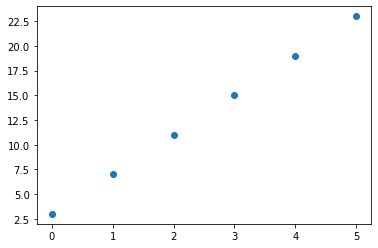

In [0]:
plt.scatter(xs, ys)
plt.show()

In [0]:
xs_1 = np.array([0, 1, 2, 3, 4, 5], dtype=float)
ys_1 = np.array([1, 2, 3, 4, 5, 6], dtype=float)

Can you see the relationship between xs and ys?

In [0]:
def predict(x):
    return 4*x + 3

predict(np.array([10, 23, 3]))

array([ 43,  95, 143])

In [0]:
model = LinearRegression()
model.fit(xs.reshape(-1, 1), ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.predict([[1], [2], [3]])

array([ 7., 11., 15.])

In [0]:
print(f'a = {model.coef_[0]}, b = {model.intercept_}')

a = 3.999999999999999, b = 3.0000000000000018


## Get started in Machine Learning in five steps

In this example we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days Thursday to Sunday, dinner or lunch and from different table size.

We want to predict how much tip the waiter will earn based on other parameters.

### Step 1: Import data

In [0]:
dataframe = sns.load_dataset('tips')

In [0]:
# dataframe.head(5)
# dataframe.tail(5)
# dataframe.sample(7)
dataframe.info()
# dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [0]:
# Just for convenience
df = dataframe

### Step 2: Data analysis

In [0]:
# Categorical data: 'sex', 'smoker', 'day', 'time'
# df['time'].unique()
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

**What is the best day to work?**
*(maximum tips)*

In [0]:
df.groupby('day').sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [0]:
result = df.groupby('day').sum()
result['percent'] = result['tip'] / result['total_bill'] * 100
result

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Smokers and non smokers, who eat more and tip more?**

In [0]:
result2 = df.groupby('smoker').sum()
result2['percent'] = result2['tip'] / result2['total_bill'] * 100
result2

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


### Step 3: Data Visualization

**#TablesPerDay**

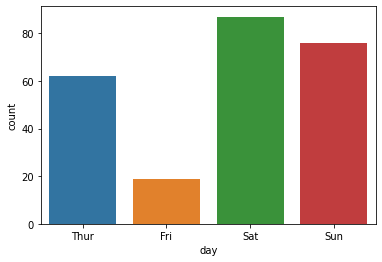

In [0]:
sns.countplot(x='day', data=df)

**#TablesPerDayPerGender**

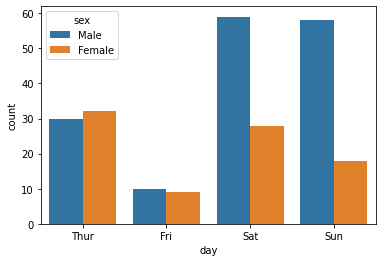

In [0]:
sns.countplot(x='day', hue='sex', data=df)

**#LunchVsDinner**

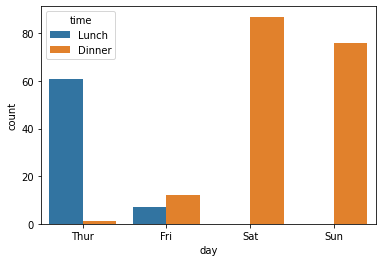

In [0]:
sns.countplot(x='day', hue='time', data=df)

**#TotalBillVsTips**

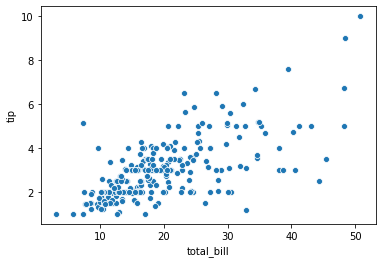

In [0]:
sns.scatterplot(x='total_bill', y='tip', data=df)

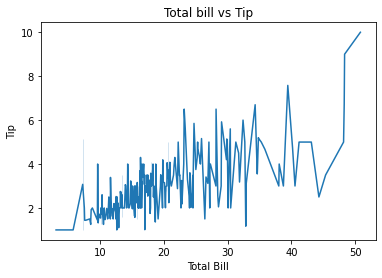

In [0]:
sns.lineplot(x='total_bill', y='tip', data=df)
plt.title('Total bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

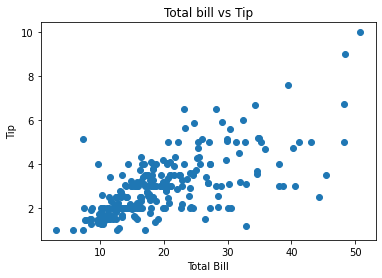

In [0]:
plt.scatter(df['total_bill'], df['tip'])
plt.title('Total bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

### Step 4: Transform and clean the data

The computer understands number only. So before we can train the model, we need to convert all the text values into numbers

**Convert the columns `sex`, `time` and `smoker` to number**

In [0]:
input_data = df.replace({'sex': {'Male':0, 'Female':1}, 
                         'smoker': {'Yes':1, 'No':0}, 
                         'time': {'Lunch':0, 'Dinner':1}})
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null int64
smoker        244 non-null int64
day           244 non-null category
time          244 non-null int64
size          244 non-null int64
dtypes: category(1), float64(2), int64(4)
memory usage: 12.0 KB


**Handle the `day` column**:

The values in day column are: Thu, Fri, Sat, Sun we can convert it to 1,2,3,4 but to get a good model, it is better to use boolean variables. We can achieve it by converting the column into 4 columns – one for each day with 0 or 1 as values. In pandas library it can be done using get_dummies.

In [0]:
input_data = pd.get_dummies(input_data, columns=['day'], drop_first=True)
input_data.head()

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,0,1,2,0,0,1
1,10.34,1.66,0,0,1,3,0,0,1
2,21.01,3.50,0,0,1,3,0,0,1
3,23.68,3.31,0,0,1,2,0,0,1
4,24.59,3.61,1,0,1,4,0,0,1


### Step 5: Build and train the model

First we create a list of features as X and predicted as Y:

In [0]:
# Notice that to select multiple columns we use the syntax:
#  [['col_1', 'col_2]]
Y = input_data['tip']
X = input_data[['sex', 'smoker', 'time', 'size', 
                'day_Fri', 'day_Sat', 'day_Sun']]

Now lets split the data into test and train so we can evaluate our model.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

print(X_train.shape, Y_train.shape)

print(X_test.shape, Y_test.shape)

(195, 7) (195,)
(49, 7) (49,)


Now lets train the model with X_train and y_train:

In [0]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's try one testing first: `three men take a smoke table on Friday lunch`

In [0]:
testing = [0, 1, 0, 3, 1, 0, 0]
model.predict([testing])

array([3.1183622])

Now let's test the model on the testing data

In [0]:
predictions = model.predict(X_test)

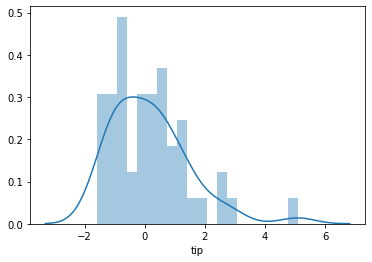

In [0]:
sns.distplot(Y_test - predictions, bins=20)

In [0]:
# Mean squared error
mean_squared_error(Y_test, predictions)

1.734540459128683

## Additional Resources

- [Get started with Google Colab](https://www.youtube.com/watch?v=inN8seMm7UI)
- [An intro to ML with sklearn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- [Linear Regression example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
- [Basic Matplotlib](https://github.com/rougier/matplotlib-tutorial)
- [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Basic Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)